<a href="https://colab.research.google.com/github/angelminsua/python/blob/main/regresion15.10.2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.6.0
/content
dataset sin normalizar=    StreamPatronage  TrafficFlowRate  ...  PreviousPatronage  BusTime
0                1       118.333333  ...                  6      504
1               11       168.000000  ...                 11      743
2               10       216.222222  ...                  9      632

[3 rows x 7 columns]
x_df=        StreamPatronage  TrafficFlowRate  ...  AccumulatedRainfall  PreviousPatronage
0                    1       118.333333  ...                  0.0                  6
1                   11       168.000000  ...                  0.0                 11
2                   10       216.222222  ...                  0.0                  9
3                   26       330.952381  ...                  0.0                 12
4                   13       413.111111  ...                  0.0                 19
...                ...              ...  ...                  ...                ...
21586               20       467.222222  ...                  

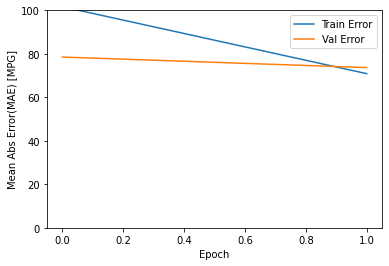

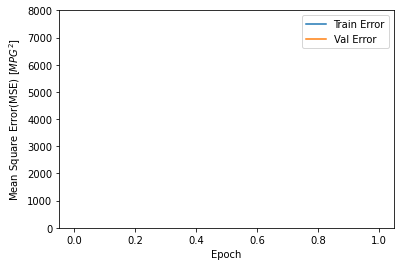

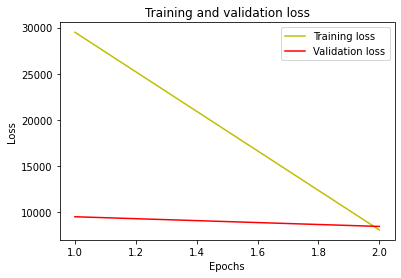

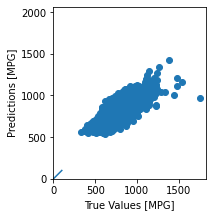

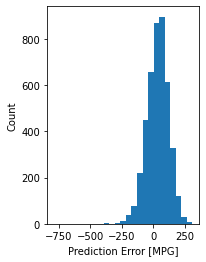

Mean Absolute Error (MAE): 74.38416674844257
Mean Squared Error (MSE): 8612.060681670839
Root Mean Squared Error (RMSE): 92.8011890100059
r_square (coeficiente de determinacion) = 0.5863418299390536


AttributeError: ignored

In [33]:

from keras.models import Sequential
from keras import layers
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

#Multilayer Perceptron (MLP): https://www.pyimagesearch.com/2019/01/21/regression-with-keras/
def create_mlp(dim, regress=True):
	# define our MLP network
	model = Sequential()
	model.add(layers.Dense(12, input_dim=dim, activation="relu"))
	#model.add(layers.Dense(100, activation="relu"))
	model.add(layers.Dense(18, activation="relu"))
	# check to see if the regression node should be added
	if regress:
	  model.add(layers.Dense(1, activation="linear"))
	
	optimizer_rms = tf.keras.optimizers.RMSprop(0.05) #parametro que se puede cambiar para mejorar 
	#from tf.keras.optimizers import SGD #from keras.optimizers import SGD
	#optimizer_sgd = SGD(learning_rate=0.01)
	model.compile(loss='mse', optimizer=optimizer_rms, metrics=['mae', 'mse'])
	return model

#alternativa al metodo anterior
"""
def build_model():
  model = Sequential([layers.Dense(99, activation='relu', input_shape=[len(train_dataset.keys())]),layers.Dense(64, activation='relu'),layers.Dense(1)])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
"""

print(tf.__version__)
!pwd

dataset = pd.read_excel('df_datos_regresion_googleColab.xlsx', sheet_name='Sheet1')
print("dataset sin normalizar=", dataset.head(3))

# dividimos el set de datos en un set de entrenamiento y otro de pruebas. Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

x_df = dataset.drop('BusTime', axis=1)
y_df= dataset['BusTime']
print("x_df=", x_df)
print("y_df=", y_df)


#normalizar dataset
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler = scaler.fit(x_df)
x= scaler.transform(x_df)
print("x_df=", (x_df))
y = y_df.to_numpy()

from sklearn.model_selection import train_test_split
train_dataset, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state = 3) #train_dataset es X_train, test_data es X_test, train_labels es y_train, test_labels es y_test. parameter "random_state": If we want the splits to be reproducible.Otherwise, each time we run train_test_split, different indices will be splitted into training and test set.
print("train_dataset.shape[1]==========================================", train_dataset.shape[1])

model = create_mlp(train_dataset.shape[1],True) #build_model()
model.summary()


#Entrenar a la modelo
#Entrene el modelo durante 1000 épocas y registre la precisión de entrenamiento y validación en el objeto history.

# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 2
history = model.fit(train_dataset, train_labels, epochs=EPOCHS, validation_split = 0.3, verbose=0, callbacks=[PrintDot()]) #entrenamos la red neuronal
print("history.params=", history.params)
print("history.history.keys()=", history.history.keys()) # dict_keys=(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])
print("history.history=", history.history)

loss, mae, mse = model.evaluate(test_data, test_labels, verbose=2) #ahora q tenemos un modelo (red neuronal con pesos específicos) lo evaluamos con los datos de test para ver el error
print("Errores (MAE y MSE) obtenidos con los datos de Test:")
print("Mean Abs Error (MAE): {:5.2f} MPG".format(mae))
print("MSE: {:5.2f} MPG".format(mse))

#Visualizar el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto history.
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#https://www.tensorflow.org/tutorials/keras/regression?hl=es-419
plt.figure() 
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error(MAE) [MPG]')
plt.plot(hist['epoch'], hist['mae'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')
plt.ylim([0,100])
plt.legend()

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error(MSE) [$MPG^2$]')
plt.plot(hist['epoch'], hist['mse'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')
plt.ylim([0,8000])
plt.legend()
plt.show()


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss'] #training loss
val_loss = history.history['val_loss'] #validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




test_predictions = model.predict(test_data).flatten()
#dibujamos las predicciones (cada punto debería dar a la misma altura en el eje x y en el y)
plt.subplot(1, 2, 1)
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()
 
#Echemos un vistazo a la distribución de errores. Debería seguir una normal
error = test_predictions - test_labels
plt.subplot(1, 2, 2)
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")
plt.show()








#from sklearn.metrics import r2_score
from sklearn import metrics
MAE = metrics.mean_absolute_error(test_labels, test_predictions)
MSE = metrics.mean_squared_error(test_labels, test_predictions)
RMSE = np.sqrt(metrics.mean_squared_error(test_labels, test_predictions))
r_square = r2_score(test_labels, test_predictions) #coeficiente de determinacion
print('Mean Absolute Error (MAE):', MAE) #test_labels es y_test (la variable dependiente pero solo el trozo del test, no el del train)
print('Mean Squared Error (MSE):', MSE) #test_predictions es y_pred (la prediccion de "y" (variable dependiente) que nos dio el modelo al llamar a  model.predict(test_data))
print('Root Mean Squared Error (RMSE):', RMSE) #es la raiz cuadrada del MSE
print("r_square (coeficiente de determinacion) =", r_square )



"""
Guardando el modelo
Puede guardar un modelo creado con la API funcional en un solo archivo. Posteriormente, puede volver a crear el mismo modelo a partir de este archivo, incluso si ya no tiene acceso al codigo que creo el modelo.
Este archivo incluye:
-Los modelos de arquitectura
-Los valores de peso del modelo (que se aprendieron durante el entrenamiento)
-La configuración de entrenamiento del modelo (lo que pasó a 'compilar'), si corresponde
-El optimizador y su estado, si corresponde (esto le permite reiniciar el entrenamiento donde lo dejó)
"""
# Guardar el Modelo
saved_model_path = "./my_model.h5"
model.save(saved_model_path)
# Recrea exactamente el mismo modelo solo desde el archivo
new_model = keras.models.load_model(saved_model_path)
# Tenga en cuenta que el estado del optimizador también se conserva. Puede reanudar el entrenamiento donde lo dejó.




#print("model.score======", model.score(test_labels, test_predictions))

"""
from sklearn.model_selection import KFold, cross_validate, cross_val_score #cross_validate: evaluate metric(s) by cross-validation and also record fit/score times.   cross_val_score: Evaluate a score by cross-validation
cv_results = cross_validate(model, x_df, y_df, cv=3,  scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print("cv_results=",cv_results)
# cross_validate also allows to specify metrics which you want to see
for i, score in enumerate(cross_validate(model, test_data, test_labels, cv=3)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")
"""